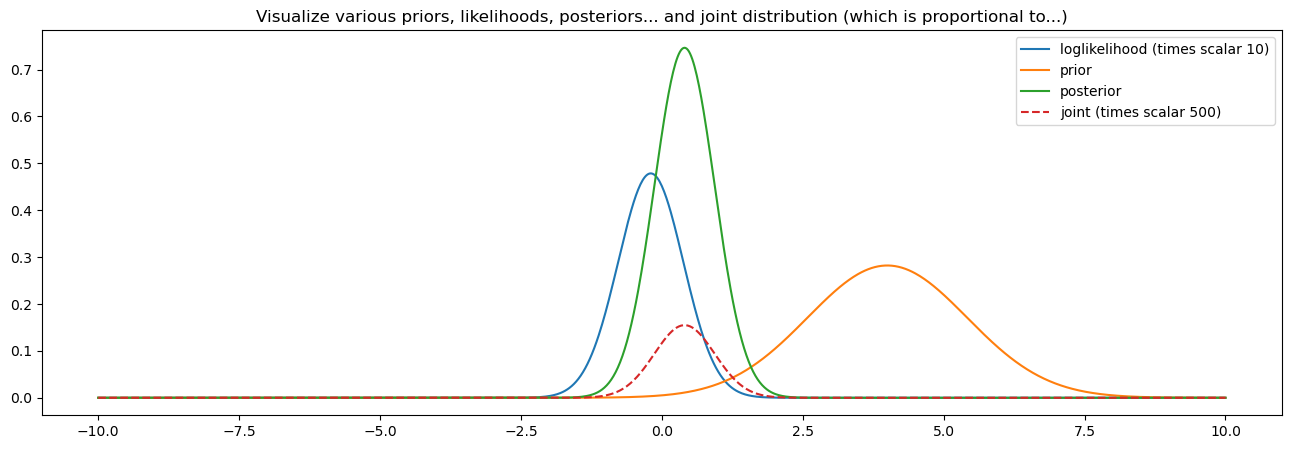

In [109]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

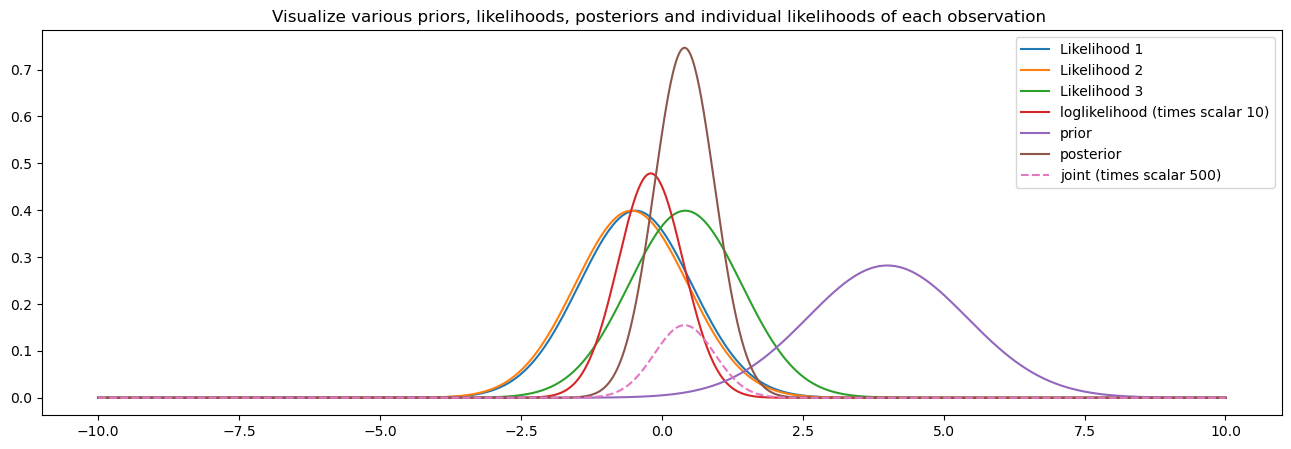

In [110]:
plt.figure(figsize=(16,5))
joint = prior

for i in range(len(x)):
    likelihoods = stats.norm.pdf(x[i], loc=parameter_domain, scale=1)
    joint *= likelihoods
    plt.plot(parameter_domain, likelihoods, label=f"Likelihood {i+1}")

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
joint = c*joint 

plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")"); 
plt.plot(parameter_domain, prior, label="prior"); 
plt.plot(parameter_domain, posterior, label="posterior"); 
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")");
plt.legend(); 
plt.title("Visualize various priors, likelihoods, posteriors and individual likelihoods of each observation "); 

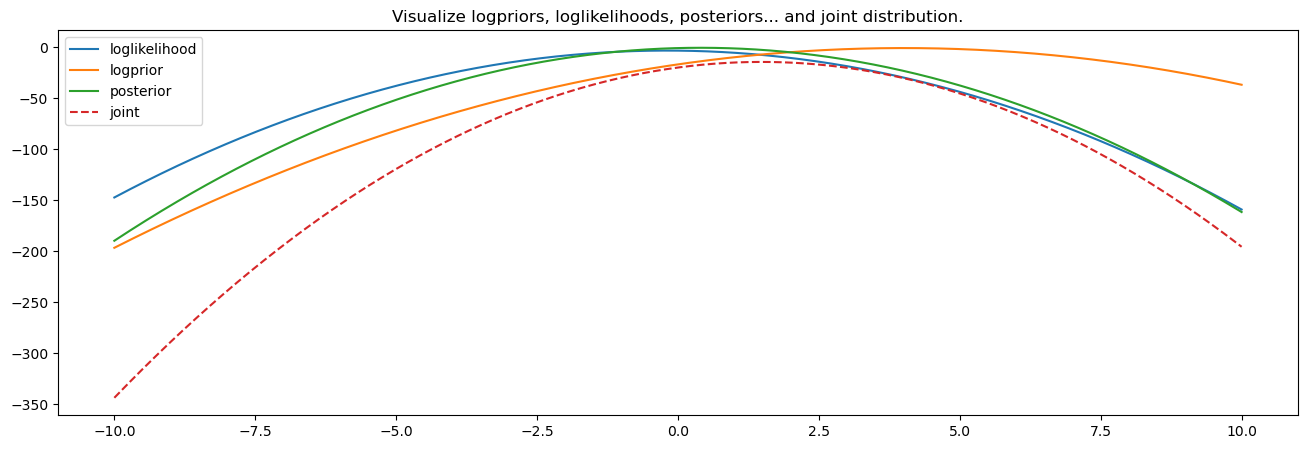

In [111]:
loglikelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1), axis=0)
                
logprior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=tau**0.5) # What if p(theta) = 1?

joint = loglikelihood + logprior

posterior = stats.norm.logpdf(parameter_domain, loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5)

plt.figure(figsize=(16,5));
plt.plot(parameter_domain, loglikelihood, label="loglikelihood");
plt.plot(parameter_domain, logprior, label="logprior"); 
plt.plot(parameter_domain, posterior, label="posterior");
plt.plot(parameter_domain, joint, linestyle="--", label="joint");
plt.legend();
plt.title("Visualize logpriors, loglikelihoods, posteriors... and joint distribution."); 

3. What is the posterior distribution of a normal likelihood with 𝑝(𝜃)∝1?

The posterior will still be a normal likelihood; we can do the calculations and see that p(θ∣x)∝p(x∣θ)⋅p(θ) = p(θ∣x)∝p(x∣θ) assuming p(x∣θ) is normal p(θ∣x) will be normal as well.

4. How do log likelihoods and posteriors differ from each other as a result of improper priors and marginal likelihood constants?

Improper priors may lead to potentially uninformative posteriors. They differ by the log of the normalizing constant. !
